---
title: Applying Machine Learning and Deep Learning Methods
format:
    html:
        embed-resources: true
        toc: true
---


# Overview

We will be using some machine learning (SVMs) and deep learning methods to compare their performance to our statistical models.

** Add summary of other models here **

# Load Data

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Load the data
df = pd.read_csv("../data/academic-success.csv", sep=";")

# Print shape
print(df.shape)

# View
df.head()

(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


The data has 37 features, all numeric with the exception of the target variable which has 3 classes: `Graduate`, `Dropout`, and `Enrolled`.

## Normalization

In [193]:
# Import one hot encoder
from keras.utils import to_categorical
# Normalize the data

# Pull out the target variable
y = df["Target"]

# Pull out the features
X = df.drop("Target", axis=1)

# Normalize the data
numeric_features = [
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Previous qualification (grade)",
    "Admission grade",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

# Normalize numeric features
X[numeric_features] = (X[numeric_features] - X[numeric_features].mean()) / X[numeric_features].std()

# One hot encode categorical features
category_features = X.columns.difference(numeric_features)

# Expand the categorical features
X = pd.get_dummies(X, columns=category_features)

# One hot encode categorical features
category_features = X.columns.difference(numeric_features)

# One hot encode
for category in category_features:
    X[category] = to_categorical(X[category])


# Put data back together
df = pd.concat([X, y], axis=1)

df.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Scholarship holder_0,Scholarship holder_1,Tuition fees up to date_0,Tuition fees up to date_1,Target
0,-0.804750,0.022226,-0.430314,-0.300779,-2.528274,-1.985844,-1.521085,-2.196854,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Dropout
1,2.076585,1.071805,-0.562104,-0.300779,-0.109093,-0.550130,0.418003,0.693520,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Graduate
2,-0.804750,-0.150402,-0.562104,-0.300779,-0.109093,-1.985844,-1.521085,-2.196854,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Dropout
3,-0.804750,-0.509468,-0.430314,-0.300779,-0.109093,-0.071559,0.418003,0.575546,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Graduate
4,-2.472892,1.002754,2.864442,-0.300779,-0.109093,0.167727,0.094821,0.349428,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Graduate


In [194]:
# Print data types
print(df.dtypes)

Previous qualification (grade)         float64
Admission grade                        float64
Age at enrollment                      float64
Curricular units 1st sem (credited)    float64
Curricular units 1st sem (enrolled)    float64
                                        ...   
Scholarship holder_0                   float32
Scholarship holder_1                   float32
Tuition fees up to date_0              float32
Tuition fees up to date_1              float32
Target                                  object
Length: 263, dtype: object


In [84]:
# Count na values
print(df.isna().sum())

Previous qualification (grade)         0
Admission grade                        0
Age at enrollment                      0
Curricular units 1st sem (credited)    0
Curricular units 1st sem (enrolled)    0
                                      ..
Scholarship holder_0                   0
Scholarship holder_1                   0
Tuition fees up to date_0              0
Tuition fees up to date_1              0
Target                                 0
Length: 263, dtype: int64


In [85]:
# Drop enrolled rows for classification
df=df[df["Target"]!="Enrolled"]

We drop enrolled rows for classification to focus on predicting students *final* status. This means we do not want to see students who could still dropout.

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop(columns=["Target"])
y = df["Target"]

# Encode the target
le = LabelEncoder()
y = le.fit_transform(y)

# Print encoded value conversion
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Create train and test sets 0.8 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

{'Dropout': 0, 'Graduate': 1}


In [87]:
# Print the shapes
print(X_train.shape, y_train.shape)

(2904, 262) (2904,)


In [88]:
# Get target value counts
pd.Series(y).value_counts()

1    2209
0    1421
Name: count, dtype: int64

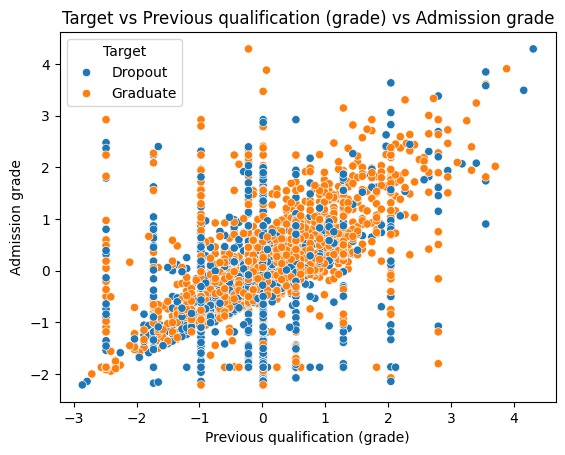

In [89]:
# Plot admission graden vs age 
sns.scatterplot(x="Previous qualification (grade)", y="Admission grade", hue="Target", data=df)
plt.title("Target vs Previous qualification (grade) vs Admission grade")
plt.show() 

The data is clearly quite messy, with no obvious linear separation of the target. Using highly complex models like deep learning may be necessary to capture the underlying patterns.

# Classification

## Deep Learning

### Build Model

We will be using a simple feedforward neural network with 2 hidden layers.

In [92]:

from keras.models import Sequential
from keras.layers import Dense

# Hyperparameters
regularization = 0.01
learning_rate = 0.001

# Create the model
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(len(X.columns),), kernel_regularizer=kr.regularizers.l2(regularization)))
model.add(Dense(64, activation="relu", kernel_regularizer=kr.regularizers.l2(regularization)))
model.add(Dense(64, activation="relu", kernel_regularizer=kr.regularizers.l2(regularization)))
model.add(Dense(64, activation="relu", kernel_regularizer=kr.regularizers.l2(regularization)))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer=kr.optimizers.Adam(learning_rate=learning_rate),
                loss=kr.losses.BinaryCrossentropy(),
                metrics=[kr.metrics.BinaryAccuracy()])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                16832     
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
Total params: 29,377
Trainable params: 29,377
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Create Early Stopping
early_stopping = kr.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=32, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/200


2024-04-08 22:25:05.268795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 2.4726 - binary_accuracy: 0.8230

2024-04-08 22:25:10.069790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 6s 56ms/step - loss: 2.4726 - binary_accuracy: 0.8230 - val_loss: 1.7165 - val_binary_accuracy: 0.8774
Epoch 2/200
91/91 [==============================] - 4s 49ms/step - loss: 1.3786 - binary_accuracy: 0.8774 - val_loss: 1.0753 - val_binary_accuracy: 0.9077
Epoch 3/200
91/91 [==============================] - 4s 48ms/step - loss: 0.9478 - binary_accuracy: 0.8864 - val_loss: 0.8385 - val_binary_accuracy: 0.8829
Epoch 4/200
91/91 [==============================] - 4s 48ms/step - loss: 0.7663 - binary_accuracy: 0.8764 - val_loss: 0.6546 - val_binary_accuracy: 0.9077
Epoch 5/200
91/91 [==============================] - 4s 47ms/step - loss: 0.6041 - binary_accuracy: 0.8981 - val_loss: 0.5555 - val_binary_accuracy: 0.9118
Epoch 6/200
91/91 [==============================] - 4s 48ms/step - loss: 0.5296 - binary_accuracy: 0.8953 - val_loss: 0.4993 - val_binary_accuracy: 0.8953
Epoch 7/200
91/91 [==============================] - 4s 48ms/step - loss: 0.

In [94]:
# Evaluate the model
model.evaluate(X_test, y_test)

# Predict
y_pred = model.predict(X_test)

# Convert the predictions to binary
y_pred = np.where(y_pred > 0.5, 1, 0)

# Print the classification report
from sklearn.metrics import classification_report
nn_report = classification_report(y_test, y_pred)
print(nn_report)

23/23 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       286
           1       0.91      0.95      0.93       440

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



2024-04-08 22:29:33.459198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


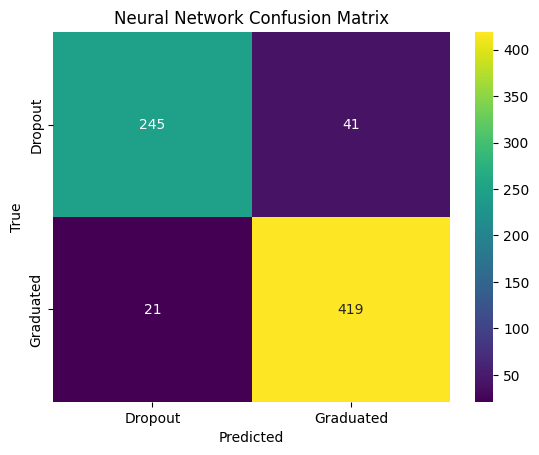

In [95]:
# Make a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')

# Convert the target back to the original classes
plt.xticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.yticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Neural Network Confusion Matrix')
plt.show()

## SVM

In [96]:
# Create svm
from sklearn.svm import SVC
from tqdm import tqdm

# Hyperparameters
c_vals = [0.1, 1, 10, 100]
kernel = ['linear', 'rbf', 'poly']
errors = []
best_params = None
best_error = np.inf

# Grid search to find best params
# SVMs are so fast that we can afford to do a grid search
for k in tqdm(kernel):
    for c in c_vals:
        svc = SVC(C=c, kernel=k)
        svc.fit(X_train, y_train)
        error = np.mean((y_test - svc.predict(X_test))**2)
        errors.append(error)
        if error < best_error:
            best_error = error
            best_params = (c, k)

# Print best params
print(f"Best params: {best_params}")


100%|██████████| 3/3 [00:15<00:00,  5.28s/it]

Best params: (1, 'poly')


In [97]:
# Create the model using best params
svc = SVC(C=best_params[0], kernel=best_params[1])

# Fit the model
svc.fit(X_train, y_train)

# Predict
y_pred = svc.predict(X_test)

# Print the classification report
svm_report = classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.95      0.85      0.89       286
           1       0.91      0.97      0.94       440

    accuracy                           0.92       726
   macro avg       0.93      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726



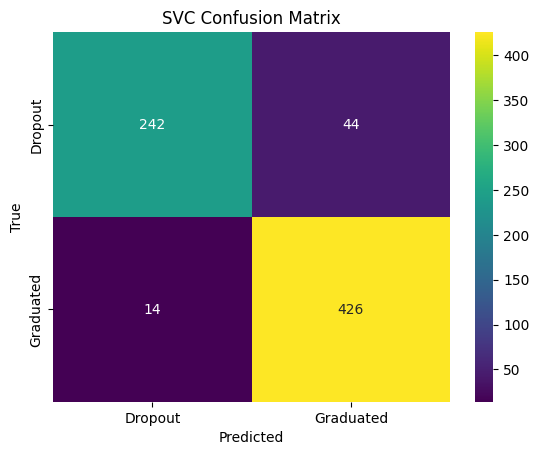

In [98]:
# Make a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')

# Convert the target back to the original classes
plt.xticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.yticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVC Confusion Matrix')
plt.show()

## Comparison

In [99]:
print("NEURAL NETWORK\n", nn_report, "\n")
print("SVM\n", svm_report, "\n")

NEURAL NETWORK
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       286
           1       0.91      0.95      0.93       440

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726
 

SVM
               precision    recall  f1-score   support

           0       0.95      0.85      0.89       286
           1       0.91      0.97      0.94       440

    accuracy                           0.92       726
   macro avg       0.93      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726
 



The models both finish with 91% accuracy, which is quite good. The deep learning model has better precision, while the SVM has better recall. These differences are comparable, resulting in the same F1 score for both models. It is extremely difficult to say which model is better, as they are both quite good.

# Regression

In [214]:
# Reread the data
df = pd.read_csv("../data/academic-success.csv", sep=";")

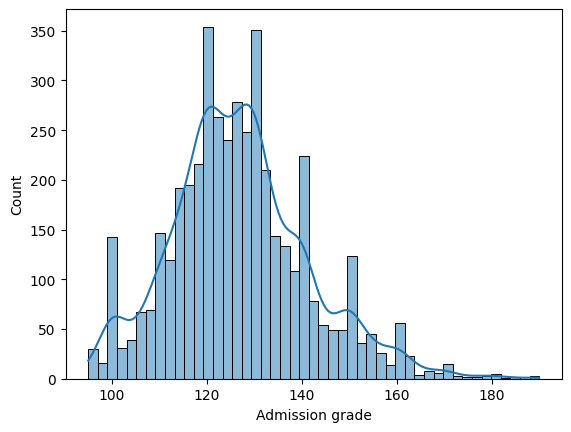

In [215]:
# Plot grade distribution
sns.histplot(df["Admission grade"], kde=True)
plt.show()

Very normal distribution of the target variable.

In [216]:
# Normalize the data

# Normalize the data
numeric_features = [
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Previous qualification (grade)",
    "Admission grade",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

# Get admission grade mean and std so we can unnorm later
admission_grade_mean = df["Admission grade"].mean()
admission_grade_std = df["Admission grade"].std()

# Normalize numeric features
df[numeric_features] = (df[numeric_features] - df[numeric_features].mean()) / df[numeric_features].std()

# One hot encode categorical features
category_features = df.columns.difference(numeric_features)

# Convert Target to Numeric
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])

# Expand the categorical features
df = pd.get_dummies(df, columns=category_features)

# Get all the new names
category_features = df.columns.difference(numeric_features)


for category in category_features:
    df[category] = to_categorical(df[category])

df.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Previous qualification_40,Previous qualification_42,Previous qualification_43,Scholarship holder_0,Scholarship holder_1,Target_0,Target_1,Target_2,Tuition fees up to date_0,Tuition fees up to date_1
0,-0.804750,0.022226,-0.430314,-0.300779,-2.528274,-1.985844,-1.521085,-2.196854,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,2.076585,1.071805,-0.562104,-0.300779,-0.109093,-0.550130,0.418003,0.693520,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,-0.804750,-0.150402,-0.562104,-0.300779,-0.109093,-1.985844,-1.521085,-2.196854,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,-0.804750,-0.509468,-0.430314,-0.300779,-0.109093,-0.071559,0.418003,0.575546,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,-2.472892,1.002754,2.864442,-0.300779,-0.109093,0.167727,0.094821,0.349428,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [217]:
from sklearn.model_selection import train_test_split

# Target is Admission grade
X = df.drop(columns=["Admission grade"])
y = df["Admission grade"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Print the shapes
print(X_train.shape, y_train.shape)

(3539, 264) (3539,)


In [218]:
# Hyperparameters
learning_rate = 0.001
reg_rate = 0.01

# Create the model for regression
model = Sequential()
model.add(
    Dense(
        64,
        activation="relu",
        input_shape=(264,),
        kernel_regularizer=kr.regularizers.l2(reg_rate),
    )
)
model.add(Dense(32, activation="relu", kernel_regularizer=kr.regularizers.l2(reg_rate)))
model.add(Dense(16, activation="relu", kernel_regularizer=kr.regularizers.l2(reg_rate)))
model.add(Dense(8, activation="relu", kernel_regularizer=kr.regularizers.l2(reg_rate)))
model.add(Dense(4, activation="relu", kernel_regularizer=kr.regularizers.l2(reg_rate)))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(
    optimizer=kr.optimizers.Adam(learning_rate=learning_rate),
    loss=kr.losses.MeanSquaredError(),
    metrics=[kr.metrics.MeanSquaredError()],
)

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 64)                16960     
                                                                 
 dense_98 (Dense)            (None, 32)                2080      
                                                                 
 dense_99 (Dense)            (None, 16)                528       
                                                                 
 dense_100 (Dense)           (None, 8)                 136       
                                                                 
 dense_101 (Dense)           (None, 4)                 36        
                                                                 
 dense_102 (Dense)           (None, 1)                 5         
                                                                 
Total params: 19,745
Trainable params: 19,745
Non-tra

In [219]:
# Define Early Stopping
early_stopping = kr.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=32, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/200


2024-04-08 23:03:08.066931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - ETA: 0s - loss: 11.6403 - mean_squared_error: 10.0598

2024-04-08 23:03:14.209442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - 8s 63ms/step - loss: 11.6403 - mean_squared_error: 10.0598 - val_loss: 31.7843 - val_mean_squared_error: 30.3789
Epoch 2/200
111/111 [==============================] - 7s 61ms/step - loss: 12.3778 - mean_squared_error: 11.0794 - val_loss: 8.2154 - val_mean_squared_error: 7.0167
Epoch 3/200
111/111 [==============================] - 7s 62ms/step - loss: 5.7950 - mean_squared_error: 4.6803 - val_loss: 4.1050 - val_mean_squared_error: 3.0722
Epoch 4/200
111/111 [==============================] - 7s 63ms/step - loss: 3.0586 - mean_squared_error: 2.0981 - val_loss: 2.5019 - val_mean_squared_error: 1.6116
Epoch 5/200
111/111 [==============================] - 7s 60ms/step - loss: 2.0343 - mean_squared_error: 1.2055 - val_loss: 1.9623 - val_mean_squared_error: 1.1930
Epoch 6/200
111/111 [==============================] - 8s 75ms/step - loss: 1.7113 - mean_squared_error: 0.9936 - val_loss: 1.7755 - val_mean_squared_error: 1.1076
Epoch 7/200
111/111 [=

In [220]:
# Evaluate the model
model.evaluate(X_test, y_test)

28/28 [==============================] - 2s 54ms/step - loss: 0.9154 - mean_squared_error: 0.6806


[0.9154495596885681, 0.6806431412696838]

 29/111 [======>.......................] - ETA: 0s

2024-04-08 23:07:16.378549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - 1s 5ms/step
Train Mean Squared Error: 0.6351937255388901


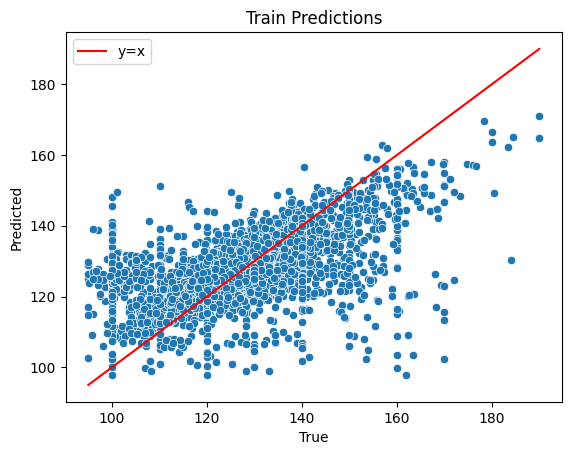

In [221]:
# Show Train vs Train Predictions
y_pred_train = model.predict(X_train)
mse = np.mean((y_train - y_pred_train.flatten())**2)
print(f"Train Mean Squared Error: {mse}")


# Unnormalize the data
y_pred_train = y_pred_train * admission_grade_std + admission_grade_mean
y_train = y_train * admission_grade_std + admission_grade_mean

# Plot the predictions
sns.scatterplot(x=y_train, y=y_pred_train.flatten())
x = np.linspace(np.min(y_train), np.max(y_train), 100)
plt.plot(x, x, '-r', label='y=x')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Train Predictions")
plt.legend(loc='best')
plt.show()

28/28 [==============================] - 0s 4ms/step
Test Mean Squared Error: 0.6806431605331318


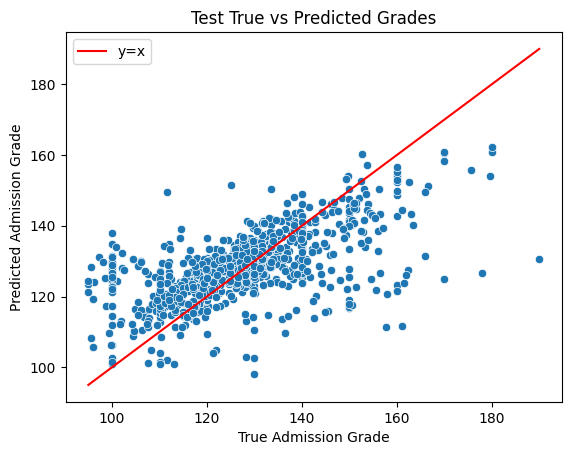

In [222]:
# Predict
y_pred = model.predict(X_test)

mse = np.mean((y_test - y_pred.flatten())**2)
print(f"Test Mean Squared Error: {mse}")

# Unnormalize the data
y_pred = y_pred * admission_grade_std + admission_grade_mean
y_test = y_test * admission_grade_std + admission_grade_mean

# Plot the predictions
sns.scatterplot(x=y_test, y=y_pred.flatten())

# Add a line
x = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.plot(x, x, '-r', label='y=x')

# Unnormalize the data

plt.xlabel('True Admission Grade')
plt.ylabel('Predicted Admission Grade')
plt.title('Test True vs Predicted Grades')
plt.legend(loc='upper left')
plt.show()

The model does pretty well on the test set. We can see a decent fit despite heavy noise.

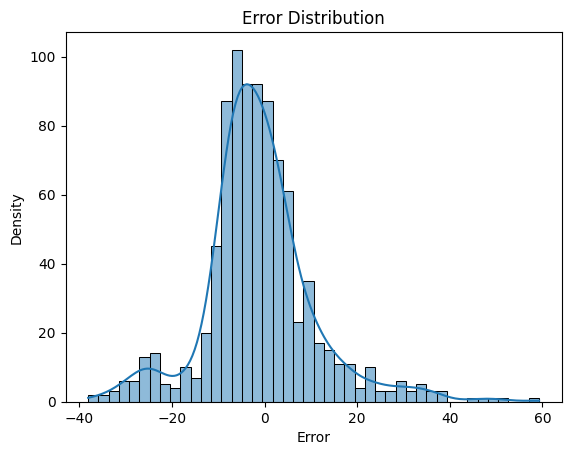

In [223]:
# Visualize the error
sns.histplot(y_test - y_pred.flatten(), kde=True)
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Distribution')
plt.show()

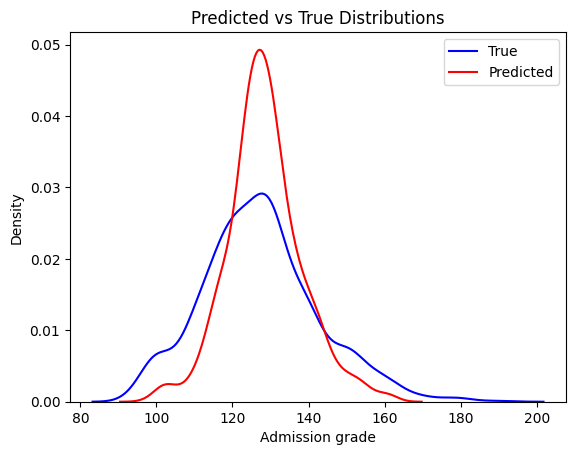

In [224]:
# Plot predictions distribution vs true
sns.kdeplot(y_test, label='True', color='blue')
sns.kdeplot(y_pred.flatten(), label='Predicted', color='red')
plt.xlabel('Admission grade')
plt.ylabel('Density')
plt.title('Predicted vs True Distributions')
plt.legend()
plt.show()

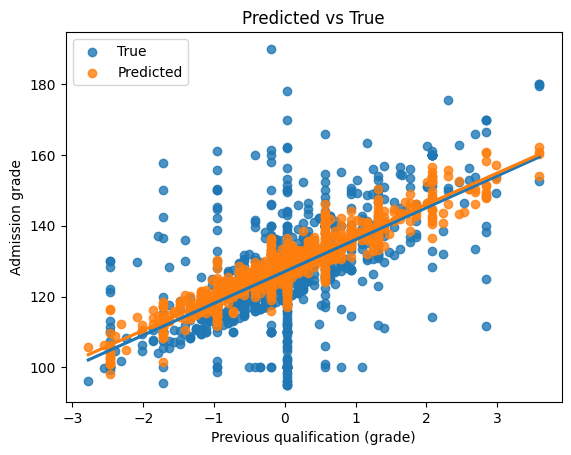

In [225]:
# Plot predicted vs true on a scatter plot
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_test, label='True', ci=None)
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_pred.flatten(), label='Predicted', ci=None)
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')
plt.title('Predicted vs True')
plt.legend()
plt.show()

There is much less noise in the predictions, as we might expect. but the model seems to miss the central trend.

## SVM

In [227]:
# Create svm
from sklearn.svm import SVR
from tqdm import tqdm

# Renormalize the y values
y_train = (y_train - admission_grade_mean) / admission_grade_std
y_test = (y_test - admission_grade_mean) / admission_grade_std

# Hyperparameters
c_vals = [0.1, 1, 5, 10]
epsilons = [0.1, 0.01, 0.001, 0.0001]
kernel = ['linear', 'rbf', 'poly']
errors = []
best_params = None
best_error = np.inf

# Grid search to find best params
# SVMs are so fast that we can afford to do a grid search
for k in tqdm(kernel):
    for c in c_vals:
        for epsilon in epsilons:
            svr = SVR(C=c, epsilon=epsilon, kernel=k)
            svr.fit(X_train, y_train)
            error = np.mean((y_test - svr.predict(X_test))**2)
            errors.append(error)
            if error < best_error:
                best_error = error
                best_params = (c, epsilon, k)

# Print best params
print(f"Best params: {best_params}")


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [07:41<00:00, 153.89s/it]

Best params: (0.1, 0.1, 'poly')


In [228]:
# Create the model
svr = SVR(C=best_params[0], epsilon=best_params[1], kernel=best_params[2])

# Fit the model
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Calculate the mean squared error
mse = np.mean((y_test - y_pred)**2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5730721473305037


Test Mean Squared Error: 0.5730721473305037


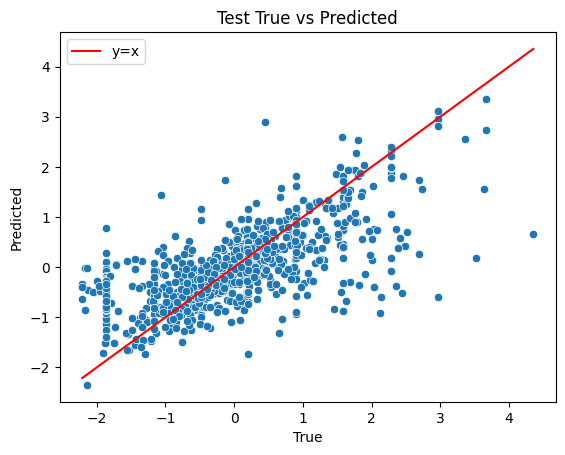

In [229]:
# Predict

mse = np.mean((y_test - y_pred.flatten())**2)
print(f"Test Mean Squared Error: {mse}")

# Plot the predictions
sns.scatterplot(x=y_test, y=y_pred.flatten())

# Add a line
x = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.plot(x, x, '-r', label='y=x')

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Test True vs Predicted')
plt.legend(loc='upper left')
plt.show()

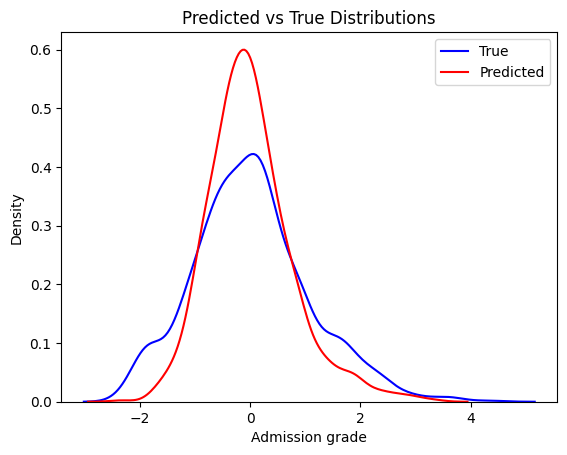

In [230]:
# Plot predictions distribution vs true
sns.kdeplot(y_test, label='True', color='blue')
sns.kdeplot(y_pred.flatten(), label='Predicted', color='red')
plt.xlabel('Admission grade')
plt.ylabel('Density')
plt.title('Predicted vs True Distributions')
plt.legend()
plt.show()

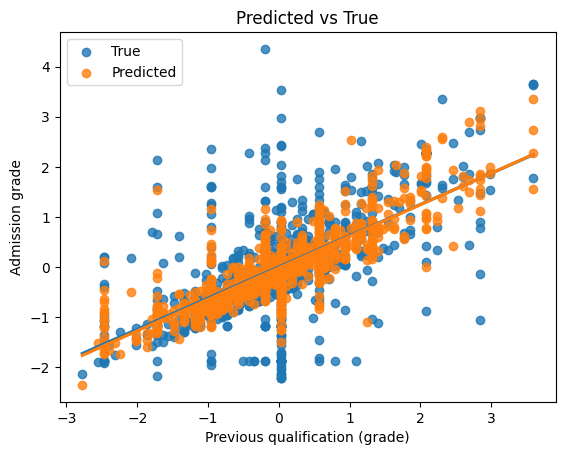

In [231]:
# Plot predicted vs true on a scatter plot
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_test, label='True', ci=None)
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_pred.flatten(), label='Predicted', ci=None)
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')
plt.title('Predicted vs True')
plt.legend()
plt.show()

## Comparison

This actually  outperforms the deep learning model. We see a  better fit t the data and a lower MSE (0.68 vs 0.57), demonstrating the power of SVMs for this type of data. However, due to the nature of deep learning, it is likely with more extensive tuning, the deep learning model could outperform the SVM as Neural Networks are known to be universal function approximators.